In [1]:
!pip install imblearn

In [1]:
# import all the dependencies 
import pandas as pd
import numpy as np
%matplotlib inline

# plot appears inside the notebook
import matplotlib.pyplot as plt
import seaborn as sns

# import Models from Sckit-Learn 
from sklearn.svm import SVC

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_roc_curve,roc_auc_score
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import (SMOTE, BorderlineSMOTE)
from imblearn.over_sampling import RandomOverSampler

In [2]:
lucene = pd.read_excel("lucene.xlsx")

lucene

,name,version,name.1,wmc,dit,noc,cbo,rfc,lcom,ca,...,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug
0,lucene,2.4,org.apache.lucene.index.DocInverterPerThread,5,2,0,19,18,0,8,...,0.000000,7,0.500000,0.400000,0,0,14.400000,3,1.2000,1
1,lucene,2.4,org.apache.lucene.search.FuzzyQuery,10,3,0,13,41,7,1,...,0.500000,0,0.720000,0.285714,2,6,27.200000,6,1.4000,1
2,lucene,2.4,org.apache.lucene.search.QueryTermVector,10,1,0,4,38,0,0,...,1.000000,0,0.000000,0.340000,0,0,27.500000,5,1.6000,0
3,lucene,2.4,org.apache.lucene.index.ReadOnlySegmentReader,4,4,0,3,7,6,2,...,0.000000,0,0.981250,0.500000,2,3,5.500000,3,1.2500,0
4,lucene,2.4,org.apache.lucene.index.DirectoryIndexReader,25,2,2,20,82,160,5,...,0.833333,5,0.768421,0.197917,2,8,22.360000,3,1.0800,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,lucene,2.4,org.apache.lucene.analysis.StopFilter,13,3,0,6,29,38,2,...,0.600000,1,0.466667,0.285714,1,2,12.307692,1,0.6154,1
336,lucene,2.4,org.apache.lucene.util.ScorerDocQueue,16,1,0,3,24,0,2,...,1.000000,2,0.000000,0.328125,0,0,21.312500,7,1.7500,1
337,lucene,2.4,org.apache.lucene.search.DefaultSimilarity,7,2,0,3,10,21,3,...,0.000000,0,0.714286,0.500000,1,2,6.714286,1,0.8571,0
338,lucene,2.4,org.apache.lucene.index.TermsHashPerThread,10,2,0,24,37,7,9,...,0.000000,8,0.333333,0.188889,0,0,25.400000,4,1.4000,0


In [3]:
np.random.seed(10)
luc_X = lucene.drop(columns=["name.1","name","version","bug"] ,axis=1)
# Xtrain
Xtest = luc_X
Xtest

,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,loc,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc
0,5,2,0,19,18,0,8,15,4,0.785714,84,0.000000,7,0.500000,0.400000,0,0,14.400000,3,1.2000
1,10,3,0,13,41,7,1,12,9,0.638889,286,0.500000,0,0.720000,0.285714,2,6,27.200000,6,1.4000
2,10,1,0,4,38,0,0,4,9,0.388889,287,1.000000,0,0.000000,0.340000,0,0,27.500000,5,1.6000
3,4,4,0,3,7,6,2,2,1,2.000000,26,0.000000,0,0.981250,0.500000,2,3,5.500000,3,1.2500
4,25,2,2,20,82,160,5,18,8,0.881944,596,0.833333,5,0.768421,0.197917,2,8,22.360000,3,1.0800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,13,3,0,6,29,38,2,4,11,0.716667,178,0.600000,1,0.466667,0.285714,1,2,12.307692,1,0.6154
336,16,1,0,3,24,0,2,2,12,0.383333,361,1.000000,2,0.000000,0.328125,0,0,21.312500,7,1.7500
337,7,2,0,3,10,21,3,1,7,2.000000,54,0.000000,0,0.714286,0.500000,1,2,6.714286,1,0.8571
338,10,2,0,24,37,7,9,18,4,0.759259,276,0.000000,8,0.333333,0.188889,0,0,25.400000,4,1.4000


In [4]:
np.random.seed(10)
# turning the dataset to an array
luc_y = lucene["bug"]
ytest = luc_y
# a
ytest





0      1
1      1
2      0
3      0
4      1
      ..
335    1
336    1
337    0
338    0
339    1
Name: bug, Length: 340, dtype: int64

In [6]:
np.random.seed(17)
lucene2 = pd.read_excel("lunce_2.xls")
lucene2

,name,version,name33,wmc,dit,noc,cbo,rfc,lcom,ca,...,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug
0,lucene,2.2,org.apache.lucene.search.FuzzyQuery,10,3,0,13,42,7,1,...,0.500000,0,0.720000,0.285714,3,4,26.600000,6,1.4000,1
1,lucene,2.2,org.apache.lucene.index.MultiLevelSkipListReader,10,1,1,4,21,0,1,...,1.000000,1,0.000000,0.500000,0,0,45.300000,2,1.0000,1
2,lucene,2.2,org.apache.lucene.store.RAMDirectory,17,2,0,11,42,0,2,...,0.333333,0,0.586207,0.352941,1,5,21.941176,2,0.8824,1
3,lucene,2.2,org.apache.lucene.search.spans.SpanQuery,5,2,5,17,7,10,12,...,0.000000,0,0.750000,0.466667,1,1,1.800000,1,0.8000,0
4,lucene,2.2,org.apache.lucene.index.TermPositions,4,1,0,23,4,6,22,...,0.000000,0,0.000000,0.500000,0,0,0.000000,1,1.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,lucene,2.2,org.apache.lucene.search.BooleanScorer2,21,2,0,16,58,104,5,...,1.000000,3,0.320000,0.237500,1,3,22.952381,6,1.6667,1
247,lucene,2.2,org.apache.lucene.search.DisjunctionSumScorer,12,2,1,7,37,0,2,...,1.000000,1,0.444444,0.416667,1,3,28.083333,1,0.8333,0
248,lucene,2.2,org.apache.lucene.index.TermBuffer,11,1,0,4,25,0,1,...,1.000000,1,0.000000,0.242857,0,0,20.454545,3,1.4545,0
249,lucene,2.2,org.apache.lucene.store.BufferedIndexOutput,10,2,1,2,12,17,1,...,0.750000,0,0.608696,0.360000,1,3,17.100000,1,0.9000,0


In [7]:
# this is the X DATA for lucence2.2
np.random.seed(17)
lucX = lucene2.drop(columns=["name33","name","version","bug"] ,axis=1)
lucX

,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,loc,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc
0,10,3,0,13,42,7,1,12,9,0.638889,280,0.500000,0,0.720000,0.285714,3,4,26.600000,6,1.4000
1,10,1,1,4,21,0,1,3,1,0.619048,477,1.000000,1,0.000000,0.500000,0,0,45.300000,2,1.0000
2,17,2,0,11,42,0,2,10,15,0.562500,393,0.333333,0,0.586207,0.352941,1,5,21.941176,2,0.8824
3,5,2,5,17,7,10,12,6,4,2.000000,14,0.000000,0,0.750000,0.466667,1,1,1.800000,1,0.8000
4,4,1,0,23,4,6,22,1,4,2.000000,4,0.000000,0,0.000000,0.500000,0,0,0.000000,1,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,21,2,0,16,58,104,5,15,10,0.656250,511,1.000000,3,0.320000,0.237500,1,3,22.952381,6,1.6667
247,12,2,1,7,37,0,2,5,9,0.454545,357,1.000000,1,0.444444,0.416667,1,3,28.083333,1,0.8333
248,11,1,0,4,25,0,1,3,6,0.520000,241,1.000000,1,0.000000,0.242857,0,0,20.454545,3,1.4545
249,10,2,1,2,12,17,1,1,8,0.555556,185,0.750000,0,0.608696,0.360000,1,3,17.100000,1,0.9000


In [8]:
np.random.seed(17)
Xtrain = lucX
Xtrain

,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,loc,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc
0,10,3,0,13,42,7,1,12,9,0.638889,280,0.500000,0,0.720000,0.285714,3,4,26.600000,6,1.4000
1,10,1,1,4,21,0,1,3,1,0.619048,477,1.000000,1,0.000000,0.500000,0,0,45.300000,2,1.0000
2,17,2,0,11,42,0,2,10,15,0.562500,393,0.333333,0,0.586207,0.352941,1,5,21.941176,2,0.8824
3,5,2,5,17,7,10,12,6,4,2.000000,14,0.000000,0,0.750000,0.466667,1,1,1.800000,1,0.8000
4,4,1,0,23,4,6,22,1,4,2.000000,4,0.000000,0,0.000000,0.500000,0,0,0.000000,1,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,21,2,0,16,58,104,5,15,10,0.656250,511,1.000000,3,0.320000,0.237500,1,3,22.952381,6,1.6667
247,12,2,1,7,37,0,2,5,9,0.454545,357,1.000000,1,0.444444,0.416667,1,3,28.083333,1,0.8333
248,11,1,0,4,25,0,1,3,6,0.520000,241,1.000000,1,0.000000,0.242857,0,0,20.454545,3,1.4545
249,10,2,1,2,12,17,1,1,8,0.555556,185,0.750000,0,0.608696,0.360000,1,3,17.100000,1,0.9000


In [9]:
# turning the dataset to an array
np.random.seed(17)
lucy = lucene2["bug"]
# a = lucy.iloc[:].values
# ytest = a
ytrain = lucy
ytrain

0      1
1      1
2      1
3      0
4      1
      ..
246    1
247    0
248    0
249    0
250    0
Name: bug, Length: 251, dtype: int64

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 

model = {"svc": SVC(kernel='rbf', tol=1e-15, C=10, probability=True)}

# Create a function to fit and score model
def fit_and_score(model, X_train, X_test, y_train, y_test, random_state=42):
    """
    This method is used:
    To fit and evaluate a machine learning algorithm RandomForestClassifier.
    X_train: training data (The bug column was removed)
    X_test: It contains the label to be used for testing the model
    y_train: training label of the bug_column
    y_test: test label of the bug_column
    """
  
    # set the random seed 
    np.random.seed(10)
    model_scores = {}
    model_score_train = []
    for name , model in model.items():
#         model = make_pipeline(StandardScaler(), LogisticRegression())
        # Fit the model to the dataset of Ant Software
        model.fit(X_train, y_train)#, sample_weight=np.where(y_train==0,1.5,1))
        y_preds = model.predict(X_test)
        a = model.score(X_train, y_train)
    
        #Evaluate the model and append it score to model_score
        model_score_train.append(a)
        # this is the probability of estimates

        model_scores[name] = model.score(X_test, y_test)
        
        print(classification_report(ytest,y_preds))
        
    sns.set(font_scale=1.5) # increase the font size of the graph

    def plot_conf_matrix(y_test, y_preds):
        fig , ax = plt.subplots(figsize=(5,5))
        ax = sns.heatmap(confusion_matrix(y_test, y_preds),fmt='.1f', 
                  annot=True, #this is for box annotation
                  cbar=False) 
    
        plt.xlabel("Predicted label")
        plt.ylabel("True label")
 
       
    return model_scores,  model_score_train, plot_conf_matrix(y_test,y_preds)


              precision    recall  f1-score   support

           0       0.54      0.58      0.56       137
           1       0.70      0.66      0.68       203

    accuracy                           0.63       340
   macro avg       0.62      0.62      0.62       340
weighted avg       0.64      0.63      0.63       340



({'svc': 0.6294117647058823}, [0.6175298804780877], None)

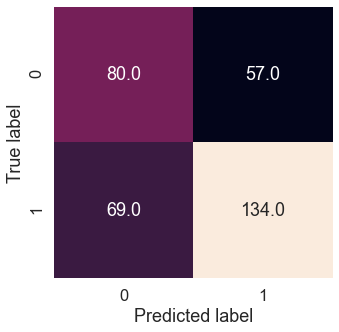

In [11]:
model_score = fit_and_score(model, X_train=Xtrain , X_test=Xtest, y_train=ytrain, y_test=ytest)
model_score

In [20]:
import time
%time
svc_grid = {"C": np.logspace(-5, 50, 50),
              "tol": np.arange(-5, 50,10),
#                "kernel": ["rbf", 'poly', 'sigmoid'],
               "max_iter": np.arange(100, 4000, 100),
                "class_weight": [None, {0:1, 0:1.5}, {0:1, 1:5}]}
# setup grid hyperparameter search for svc
gs_svc = GridSearchCV(LinearSVC(),param_grid=svc_grid,
                            n_jobs=10,
                            scoring='accuracy',
                            cv=5,
                            verbose=True)
# fit grid hyperparamter search model
gs_svc.fit(Xtrain,ytrain)



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 10 µs
Fitting 5 folds for each of 105300 candidates, totalling 526500 fits


/Users/femitemiola/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.57372549 0.57372549 ... 0.57372549 0.57372549 0.57372549]
  warnings.warn(


GridSearchCV(cv=5, estimator=SVC(), n_jobs=10,
             param_grid={'C': array([1.00000000e-05, 1.32571137e-04, 1.75751062e-03, 2.32995181e-02,
       3.08884360e-01, 4.09491506e+00, 5.42867544e+01, 7.19685673e+02,
       9.54095476e+03, 1.26485522e+05, 1.67683294e+06, 2.22299648e+07,
       2.94705170e+08, 3.90693994e+09, 5.17947468e+10, 6.86648845e+11,
       9.10298178e+12, 1.20679264e+14, 1.59985872e+1...
       7.54312006e+48, 1.00000000e+50]),
                         'class_weight': [None, {0: 1.5}, {0: 1, 1: 5}],
                         'kernel': ['rbf', 'poly', 'sigmoid'],
                         'max_iter': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100,
       1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200,
       2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300,
       3400, 3500, 3600, 3700, 3800, 3900]),
                         'tol': array([-5,  5, 15, 25, 35, 45])},
             scoring='accuracy', verbos

In [21]:
gs_svc.best_params_

{'C': 1e-05, 'class_weight': None, 'kernel': 'rbf', 'max_iter': 100, 'tol': 5}

In [12]:

gs_svc = SVC(kernel='rbf', tol=1e-15, C=10)

In [13]:
gs_svc.fit(Xtrain, ytrain)

SVC(C=10, tol=1e-15)

In [14]:
y_preds = gs_svc.predict(Xtest)

In [15]:
gs_svc.score(Xtest, ytest)

0.6294117647058823

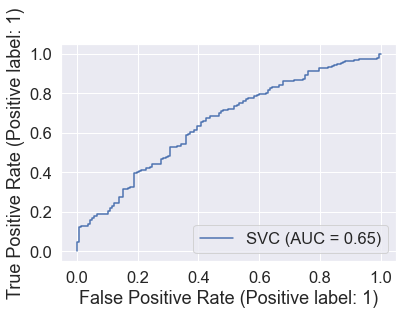

In [16]:
plot_roc_curve(gs_svc, Xtest, ytest);

In [17]:
# Confusion Matrix
# confusion matrix function
import seaborn as sns

sns.set(font_scale=1.5) # increase the font size of the graph

def plot_conf_matrix(y_test, lucene_preds):
    """
    plot a confusion matrix using seasborn's heatmap
    """
    
    fig , ax = plt.subplots(figsize=(5,5))
    ax = sns.heatmap(confusion_matrix(y_test, lucene_preds),fmt='.2f', 
                  annot=True, #this is for box annotation
                  cbar=False) 
    
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    
# plot_conf_matrix(ytest, y_preds)

In [18]:
print(classification_report(ytest, y_preds))

              precision    recall  f1-score   support

           0       0.54      0.58      0.56       137
           1       0.70      0.66      0.68       203

    accuracy                           0.63       340
   macro avg       0.62      0.62      0.62       340
weighted avg       0.64      0.63      0.63       340



In [19]:
lucene_preds = y_preds
lps = lucene_preds

In [20]:
a = list(lucene_preds)

In [21]:
b = list(luc_y)
#type(b)
#len(b)
# b

In [22]:
#  calculate the f1, precision and recall
def f1_score(ytest, y_preds):
    TP = 0
    TN = 0
    FN = 0
    FP = 0 
    for i , j in zip(a, b):
        if i == 0 and j == 0:
            TP +=1
        elif i == 1 and j == 1:
            TN +=1
        elif i == 1 and j == 0:
            FN += 1
        else:
            i == 0 and j == 1
            FP += 1
            
    prec = (TP/(TP + FP))
    recal = (TP /(TP + FN))
    f1 = (2 * recal * prec)/(recal + prec)
    data = {'precision': [prec] , 'recall': [recal], 'f1': [f1]}
    df = pd.DataFrame(data=data)
    
    return df

In [23]:
f1_score(ytest=b, y_preds=a)

,precision,recall,f1
0,0.536913,0.583942,0.559441


In [24]:
lis =[]
def make_list():
    c = "misclassified defective"
    d = "misclassified non_defective"
    e = "classified correctly"
    for lucypreds, lucyytest in zip(a, b):
        if lucypreds < lucyytest:
            lis.append(d)
        elif lucyytest < lucypreds:
            lis.append(c)
        else:
            lis.append(e)
    return lis

newstatas = make_list()
newstatas

['misclassified non_defective',
 'classified correctly',
 'misclassified defective',
 'classified correctly',
 'classified correctly',
 'classified correctly',
 'classified correctly',
 'classified correctly',
 'misclassified defective',
 'classified correctly',
 'misclassified defective',
 'classified correctly',
 'classified correctly',
 'classified correctly',
 'misclassified non_defective',
 'misclassified non_defective',
 'misclassified non_defective',
 'classified correctly',
 'misclassified non_defective',
 'classified correctly',
 'classified correctly',
 'classified correctly',
 'classified correctly',
 'classified correctly',
 'classified correctly',
 'misclassified defective',
 'classified correctly',
 'classified correctly',
 'classified correctly',
 'classified correctly',
 'classified correctly',
 'misclassified non_defective',
 'classified correctly',
 'misclassified non_defective',
 'misclassified defective',
 'classified correctly',
 'classified correctly',
 'classifie

In [25]:
# if you call pandas on the dataframe you will  with 
df = pd.DataFrame(newstatas)
df.rename(columns={"class_error_cols": "bug"})
df.rename(columns={0: "bug"})
df3 = df.rename(columns={0: "bug"})
# df3.set_index()
df3

,bug
0,misclassified non_defective
1,classified correctly
2,misclassified defective
3,classified correctly
4,classified correctly
...,...
335,classified correctly
336,classified correctly
337,classified correctly
338,misclassified defective


In [26]:
af = luc_y.reset_index()
af

,index,bug
0,0,1
1,1,1
2,2,0
3,3,0
4,4,1
...,...,...
335,335,1
336,336,1
337,337,0
338,338,0


In [27]:
luc_gspreds_df = pd.DataFrame(lucene_preds)
afs = luc_gspreds_df.rename(columns={0:"bug"})
afs

,bug
0,0
1,1
2,1
3,0
4,1
...,...
335,1
336,1
337,0
338,1


In [28]:
# Create a new Data
newData = pd.concat([af,afs, df3],axis=1, ignore_index=False, join="inner")
newData
new_Data = newData.set_index('index')
new_Data

,bug,bug,bug
index,,,
0,1,0,misclassified non_defective
1,1,1,classified correctly
2,0,1,misclassified defective
3,0,0,classified correctly
4,1,1,classified correctly
...,...,...,...
335,1,1,classified correctly
336,1,1,classified correctly
337,0,0,classified correctly


In [29]:
df2 = pd.DataFrame(luc_X)
df2

,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,loc,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc
0,5,2,0,19,18,0,8,15,4,0.785714,84,0.000000,7,0.500000,0.400000,0,0,14.400000,3,1.2000
1,10,3,0,13,41,7,1,12,9,0.638889,286,0.500000,0,0.720000,0.285714,2,6,27.200000,6,1.4000
2,10,1,0,4,38,0,0,4,9,0.388889,287,1.000000,0,0.000000,0.340000,0,0,27.500000,5,1.6000
3,4,4,0,3,7,6,2,2,1,2.000000,26,0.000000,0,0.981250,0.500000,2,3,5.500000,3,1.2500
4,25,2,2,20,82,160,5,18,8,0.881944,596,0.833333,5,0.768421,0.197917,2,8,22.360000,3,1.0800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,13,3,0,6,29,38,2,4,11,0.716667,178,0.600000,1,0.466667,0.285714,1,2,12.307692,1,0.6154
336,16,1,0,3,24,0,2,2,12,0.383333,361,1.000000,2,0.000000,0.328125,0,0,21.312500,7,1.7500
337,7,2,0,3,10,21,3,1,7,2.000000,54,0.000000,0,0.714286,0.500000,1,2,6.714286,1,0.8571
338,10,2,0,24,37,7,9,18,4,0.759259,276,0.000000,8,0.333333,0.188889,0,0,25.400000,4,1.4000


In [30]:
new_Data= pd.concat([luc_X, new_Data], axis=1, join="outer")
new_Data

,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,...,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug,bug,bug
0,5,2,0,19,18,0,8,15,4,0.785714,...,0.500000,0.400000,0,0,14.400000,3,1.2000,1,0,misclassified non_defective
1,10,3,0,13,41,7,1,12,9,0.638889,...,0.720000,0.285714,2,6,27.200000,6,1.4000,1,1,classified correctly
2,10,1,0,4,38,0,0,4,9,0.388889,...,0.000000,0.340000,0,0,27.500000,5,1.6000,0,1,misclassified defective
3,4,4,0,3,7,6,2,2,1,2.000000,...,0.981250,0.500000,2,3,5.500000,3,1.2500,0,0,classified correctly
4,25,2,2,20,82,160,5,18,8,0.881944,...,0.768421,0.197917,2,8,22.360000,3,1.0800,1,1,classified correctly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,13,3,0,6,29,38,2,4,11,0.716667,...,0.466667,0.285714,1,2,12.307692,1,0.6154,1,1,classified correctly
336,16,1,0,3,24,0,2,2,12,0.383333,...,0.000000,0.328125,0,0,21.312500,7,1.7500,1,1,classified correctly
337,7,2,0,3,10,21,3,1,7,2.000000,...,0.714286,0.500000,1,2,6.714286,1,0.8571,0,0,classified correctly
338,10,2,0,24,37,7,9,18,4,0.759259,...,0.333333,0.188889,0,0,25.400000,4,1.4000,0,1,misclassified defective


In [31]:
new_Data.to_excel("new_Data_SVC.xlsx", sheet_name="Tt")

In [5]:
data_svc  = pd.read_excel("new_Data_SVC.xlsx")

In [42]:
da_lr = pd.read_excel("new_Data_LR.xlsx")

In [32]:
dataLR = da_lr.drop("bug_preds_lr", axis=1)

NameError: name 'da_lr' is not defined

In [45]:
mc_lr_test = da_lr["bug_preds_lr"]
mc_lr_test

0      1
1      1
2      1
3      0
4      1
      ..
335    1
336    1
337    0
338    1
339    0
Name: bug_preds_lr, Length: 340, dtype: int64

In [6]:
dataSVC = data_svc.drop("bug_preds_svc", axis=1)

KeyError: "['bug_preds_svc'] not found in axis"

In [34]:
mc_svc_test = data_svc["bug_preds_svc"]

In [35]:
a = list(mc_svc_test)

In [36]:
b = list(mc_lr_test)

NameError: name 'mc_lr_test' is not defined

In [74]:
bugs =  dataLR.drop("bug", axis=1)
c = dataLR["bug"]
c = list(c)


NameError: name 'dataLR' is not defined

In [75]:
data_svc

,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,...,cbm,amc,max_cc,avg_cc,bug k,bug_preds_svc i,bug_preds_lr j,bug_svc,bug_lr,Unnamed: 25
0,5,2,0,19,18,0,8,15,4,0.785714,...,0,14.400000,3,1.2000,1,0,1,misclassified non_defective,classified correctly,NaN
1,10,3,0,13,41,7,1,12,9,0.638889,...,6,27.200000,6,1.4000,1,1,1,classified correctly,classified correctly,NaN
2,10,1,0,4,38,0,0,4,9,0.388889,...,0,27.500000,5,1.6000,0,1,1,misclassified defective,misclassified defective,NaN
3,4,4,0,3,7,6,2,2,1,2.000000,...,3,5.500000,3,1.2500,0,0,0,classified correctly,classified correctly,NaN
4,25,2,2,20,82,160,5,18,8,0.881944,...,8,22.360000,3,1.0800,1,1,1,classified correctly,classified correctly,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,13,3,0,6,29,38,2,4,11,0.716667,...,2,12.307692,1,0.6154,1,1,1,classified correctly,classified correctly,NaN
336,16,1,0,3,24,0,2,2,12,0.383333,...,0,21.312500,7,1.7500,1,1,1,classified correctly,classified correctly,NaN
337,7,2,0,3,10,21,3,1,7,2.000000,...,2,6.714286,1,0.8571,0,0,0,classified correctly,classified correctly,NaN
338,10,2,0,24,37,7,9,18,4,0.759259,...,0,25.400000,4,1.4000,0,1,1,misclassified defective,misclassified defective,NaN


In [21]:
data_svc  = pd.read_excel("new_Data_SVC.xlsx")


In [22]:
data_svc

,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,...,ic,cbm,amc,max_cc,avg_cc,bug1,bug_preds_svc1,bug_preds_lr 1,bug_svc,bug_lr
0,5,2,0,19,18,0,8,15,4,0.785714,...,0,0,14.400000,3,1.2000,1,0,1,misclassified non_defective,classified correctly
1,10,3,0,13,41,7,1,12,9,0.638889,...,2,6,27.200000,6,1.4000,1,1,1,classified correctly,classified correctly
2,10,1,0,4,38,0,0,4,9,0.388889,...,0,0,27.500000,5,1.6000,0,1,1,misclassified defective,misclassified defective
3,4,4,0,3,7,6,2,2,1,2.000000,...,2,3,5.500000,3,1.2500,0,0,0,classified correctly,classified correctly
4,25,2,2,20,82,160,5,18,8,0.881944,...,2,8,22.360000,3,1.0800,1,1,1,classified correctly,classified correctly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,13,3,0,6,29,38,2,4,11,0.716667,...,1,2,12.307692,1,0.6154,1,1,1,classified correctly,classified correctly
336,16,1,0,3,24,0,2,2,12,0.383333,...,0,0,21.312500,7,1.7500,1,1,1,classified correctly,classified correctly
337,7,2,0,3,10,21,3,1,7,2.000000,...,1,2,6.714286,1,0.8571,0,0,0,classified correctly,classified correctly
338,10,2,0,24,37,7,9,18,4,0.759259,...,0,0,25.400000,4,1.4000,0,1,1,misclassified defective,misclassified defective


In [15]:
dav_svc = data_svc.drop("bug_svc", axis=1)
dav_svc = data_svc["bug_svc"]

In [23]:
bug = data_svc.drop("bug1", axis=1)
bug = data_svc["bug1"]

In [27]:
data_svc

,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,...,ic,cbm,amc,max_cc,avg_cc,bug1,bug_preds_svc1,bug_preds_lr 1,bug_svc,bug_lr
0,5,2,0,19,18,0,8,15,4,0.785714,...,0,0,14.400000,3,1.2000,1,0,1,misclassified non_defective,classified correctly
1,10,3,0,13,41,7,1,12,9,0.638889,...,2,6,27.200000,6,1.4000,1,1,1,classified correctly,classified correctly
2,10,1,0,4,38,0,0,4,9,0.388889,...,0,0,27.500000,5,1.6000,0,1,1,misclassified defective,misclassified defective
3,4,4,0,3,7,6,2,2,1,2.000000,...,2,3,5.500000,3,1.2500,0,0,0,classified correctly,classified correctly
4,25,2,2,20,82,160,5,18,8,0.881944,...,2,8,22.360000,3,1.0800,1,1,1,classified correctly,classified correctly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,13,3,0,6,29,38,2,4,11,0.716667,...,1,2,12.307692,1,0.6154,1,1,1,classified correctly,classified correctly
336,16,1,0,3,24,0,2,2,12,0.383333,...,0,0,21.312500,7,1.7500,1,1,1,classified correctly,classified correctly
337,7,2,0,3,10,21,3,1,7,2.000000,...,1,2,6.714286,1,0.8571,0,0,0,classified correctly,classified correctly
338,10,2,0,24,37,7,9,18,4,0.759259,...,0,0,25.400000,4,1.4000,0,1,1,misclassified defective,misclassified defective


In [28]:
data_preds_svc  = data_svc.drop("bug_preds_svc1",inplace=True)
data_preds_svc  = data_svc["bug_preds_svc1"]

KeyError: "['bug_preds_svc1'] not found in axis"

In [45]:
data_svc_preds = data_svc["bug_preds_svc"]
data_svc_preds


0      0
1      1
2      1
3      0
4      1
      ..
335    1
336    1
337    0
338    1
339    0
Name: bug_preds_svc, Length: 340, dtype: int64

In [46]:
data_s = data_svc.drop("bug_preds_svc", axis=1)
data_preds_lr = data_svc.drop("bug_preds_lr", axis=1)

In [47]:
data_preds_lr = data_svc["bug_preds_lr"]

In [48]:
data_preds_lr

0      1
1      1
2      1
3      0
4      1
      ..
335    1
336    1
337    0
338    1
339    0
Name: bug_preds_lr, Length: 340, dtype: int64

In [49]:
svm = list(data_svc_preds)

In [50]:
lr = list(data_preds_lr)

In [51]:
bug = list(data_bug )

In [52]:
data_svm = data_svc["bug_svc"]
data_svm2 = list(data_svm)

In [53]:
data_lrg = data_svc["bug_lr"]
data_lrg2 = list(data_lrg)

In [88]:
def miss_class(a, b):
    count = 0
    x = "missclassified defective"
    y = "missclassified non_defective"
    for i , j in zip(a, b):
        if i == x:
            count +=1
    return count

In [89]:
miss_class(a=data_svm2, b=data_lrg2)

0

In [65]:
def mc_Nemar_test(a, b , c):
    missclassified_by_both = 0
    classified_by_both = 0
    missclassified_by_svc = 0
    missclassified_by_lr = 0
#     i is svc , j is lr, k is actual bug
    for i, j, k in zip(a, b, c):
        if (k == i) and not j:
            missclassified_by_svc +=1
        elif (k == j) and not i:
            missclassified_by_lr += 1
        elif (i and j) == k:
            classified_by_both  += 1
        elif (i and j) != k:
            missclassified_by_both +=1
    return missclassified_by_svc, missclassified_by_lr, classified_by_both, missclassified_by_both 
            

In [66]:
mc_Nemar_test(a=svm, b=lr, c=bug)

(54, 33, 161, 92)

In [56]:
def mc_Nemar_test(a, b , c):
    missclassified_by_both = 0
    classified_by_both = 0
    missclassified_by_svc = 0
    missclassified_by_lr = 0
#     i is svc , j is lr, k is actual bug
    for i, j, k in zip(a, b, c):
        if   k == i != j:
            missclassified_by_svc +=1
        elif k == j != i:
            missclassified_by_lr += 1
        elif i == j == k:
            classified_by_both  += 1
        elif i == j != k:
            missclassified_by_both +=1  
    return missclassified_by_svc, missclassified_by_lr, classified_by_both, missclassified_by_both 

In [57]:
mc_Nemar_test(a=svm, b=lr, c=bug)

(42, 34, 172, 92)

In [58]:
i = 1
j = 1
k = 3
print(i != j)

False


In [59]:
ytest

0      1
1      1
2      0
3      0
4      1
      ..
335    1
336    1
337    0
338    0
339    1
Name: bug, Length: 340, dtype: int64

In [60]:
from collections import Counter
counter = Counter(ytest)
for sam_1 ,  sam_0 in counter.items():
    dist = sam_0/len(ytest) * 100
    print(f"Class={sam_1} , n={sam_0} ({dist}%)")

Class=1 , n=203 (59.705882352941174%)
Class=0 , n=137 (40.294117647058826%)


In [61]:
def mc_Nemar_test(a, b , c):
    missclassified_by_both = 0
    classified_by_both = 0
    missclassified_by_svc = 0
    missclassified_by_lr = 0
#     i is svm , j is lr, k is actual bug
    for i, j, k in zip(a, b, c):
        if  (k == i) and (k != j) and (i != j):
            missclassified_by_lr +=1
        elif (k == j) and (k != i) and (j != i):
            missclassified_by_svc += 1
        elif (i == j) and (i == j) and (j== k):
            classified_by_both  += 1
        elif (i == j) and (k != j) and (k != i):
            missclassified_by_both +=1  
    return  missclassified_by_lr, missclassified_by_svc, classified_by_both, missclassified_by_both 

In [62]:
mc_Nemar_test(a=svm, b=lr, c=bug)

(42, 34, 172, 92)